In [1]:
import pandas as pd
import numpy as np

In [2]:
#import functions needed to set up the dataset
from prepare_data import create_testdata
from preprocessing import preprocessing


In [3]:
#create datasets
df=preprocessing()
features_train,windspeed_train,features_test,windspeed_test=create_testdata(df,'50')

In [4]:
#seperate out the one-hot encoding variables before standardization 
df1 = features_train.iloc[:, :17]
df2 = features_train.iloc[:, 17:]
df3 = features_test.iloc[:, :17]
df4 = features_test.iloc[:, 17:]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
dftrain=scaler.transform(df1)
dftest=scaler.transform(df3)

In [6]:
df1=pd.DataFrame(data=dftrain,index=df1.index.values,columns=df1.columns.values)
df3=pd.DataFrame(data=dftest,index=df3.index.values,columns=df3.columns.values)

In [7]:
features_train=pd.concat([df1,df2], axis=1)
features_test=pd.concat([df3,df4], axis=1)

In [9]:
features_train.describe()

,Distance to the closest Airport (kms),Distance to the closest Builtup (kms),Distance to the closest roads (kms),Distance to the closest Agricultural area (kms),Distance to the closest Barren area (kms),Distance to the closest Settlement (kms),Distance to the closest Shrubland (kms),Distance to the closest Vegetation (kms),Distance to the closest Water (kms),Distance to the closest Wetland (kms),...,Lat,Long,France,India,Italy,Portugal,Scotland,South Africa,Thailand,Turkey
count,2.663900e+04,2.663900e+04,2.663900e+04,2.663900e+04,2.663900e+04,2.663900e+04,2.663900e+04,2.663900e+04,2.663900e+04,2.663900e+04,...,2.663900e+04,2.663900e+04,26639.000000,26639.000000,26639.000000,26639.000000,26639.000000,26639.000000,26639.000000,26639.000000
mean,-1.519812e-15,-6.999877e-16,-3.854252e-17,3.891344e-17,-6.943030e-16,5.333928e-16,8.566605e-16,-3.298828e-16,-5.408873e-16,5.412540e-17,...,2.901696e-15,2.494345e-17,0.098727,0.631443,0.111904,0.040242,0.037839,0.025677,0.004617,0.049551
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,0.298301,0.482423,0.315254,0.196529,0.190811,0.158172,0.067795,0.217020
min,-1.486843e+00,-1.412727e+00,-4.463291e-01,-9.884205e-01,-8.195257e-01,-1.025757e+00,-4.045143e-01,-7.509547e-01,-1.210382e+00,-1.094692e+00,...,-3.360595e+00,-1.862956e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.365120e-01,-7.595146e-01,-2.386578e-01,-7.709098e-01,-7.037225e-01,-6.131201e-01,-3.802894e-01,-5.226464e-01,-6.752545e-01,-8.103357e-01,...,-8.678830e-01,-1.104280e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.559644e-01,-3.552328e-01,-1.194211e-01,-3.879146e-01,-4.939394e-01,-2.682984e-01,-3.390379e-01,-2.814248e-01,-2.749247e-01,-3.151369e-01,...,-1.186791e-01,6.103291e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.450928e-01,8.318109e-01,4.847325e-02,5.038151e-01,4.114476e-01,2.935473e-01,-2.051645e-01,1.354120e-01,3.182399e-01,6.658753e-01,...,9.090112e-01,8.039389e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.471485e+00,7.613613e+00,3.473497e+01,4.298142e+00,4.247556e+00,8.568949e+00,4.798898e+00,1.394084e+01,5.751835e+00,7.133752e+00,...,1.955473e+00,1.547247e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
features_train.columns.values

array(['Distance to the closest Airport (kms)',
       'Distance to the closest Builtup (kms)',
       'Distance to the closest roads (kms)',
       'Distance to the closest Agricultural area (kms)',
       'Distance to the closest Barren area (kms)',
       'Distance to the closest Settlement (kms)',
       'Distance to the closest Shrubland (kms)',
       'Distance to the closest Vegetation (kms)',
       'Distance to the closest Water (kms)',
       'Distance to the closest Wetland (kms)',
       'Distance to the closest Forest (kms)',
       'Distance to the closest Grassland (kms)',
       'Distance to the closest Substation (kms)',
       'Elevation of Turbines (meters)', 'Slope', 'Lat', 'Long', 'France',
       'India', 'Italy', 'Portugal', 'Scotland', 'South Africa',
       'Thailand', 'Turkey'], dtype=object)

In [19]:
import lightgbm as lgb

/Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [20]:
reg=lgb.LGBMRegressor()

In [21]:
reg.fit(features_train,windspeed_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
y_predict=reg.predict(features_test)
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

mse error on test set is -0.247953070292383.


In [22]:
subset_data_x=features_train.iloc[0:10000]
subset_data_y=windspeed_train[0:10000]

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel

In [24]:
kernel = ConstantKernel(0.1, (1e-23, 1e5)) * \
         RBF(0.1*np.ones(subset_data_x.shape[1]), (1e-23, 1e10) ) + \
         WhiteKernel(0.1, (1e-23, 1e5))

In [25]:
#default kernel
gpr = GaussianProcessRegressor(random_state=0,n_restarts_optimizer=2,kernel=kernel)

In [ ]:
gpr.fit(subset_data_x,subset_data_y)

In [21]:
y_predict=gpr.predict(features_test)
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

mse error on test set is -32.68129260384737.


In [20]:
gpr.kernel_

316**2 * RBF(length_scale=[1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 1e+10, 0.145, 0.135, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) + WhiteKernel(noise_level=0.529)

In [18]:
from sklearn.gaussian_process.kernels import Matern
kernel=1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5)

In [19]:
gpr1 = GaussianProcessRegressor(kernel=kernel,random_state=0)

In [ ]:
gpr1.fit(subset_data_x,subset_data_y)

In [1]:
#PCA regression

In [10]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [11]:
pca = PCA()

In [12]:
X_reduced = pca.fit_transform(features_train)

In [14]:
X_reduced.shape

(26639, 25)

In [15]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 22.96,  35.9 ,  47.33,  55.49,  62.41,  68.36,  73.97,  78.94,
        82.83,  86.36,  89.11,  91.65,  94.03,  95.95,  97.24,  98.31,
        99.09,  99.48,  99.71,  99.89,  99.97,  99.99, 100.  , 100.  ,
       100.  ])

In [16]:
regr = LinearRegression()

In [21]:
from sklearn.model_selection import cross_val_score,KFold

In [22]:
kfold=10 #default 10-fold cross validation
cv = KFold(n_splits=kfold, shuffle=True, random_state=1)

In [24]:
score = cross_val_score(regr, X_reduced, windspeed_train, scoring='neg_mean_squared_error',cv=cv)

In [26]:
score.mean()

-0.6602670224067013

In [27]:
regr.fit(X_reduced, windspeed_train)
X_reduced_test=pca.transform(features_test)

In [29]:
y_predict=regr.predict(X_reduced_test)
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('rmse error on test set is {}.'.format(final_error))

rmse error on test set is -0.655319807047255.


In [34]:
pca.score(X_reduced_test)

-inf

In [8]:
from skrvm import RVR
clf = RVR(kernel='linear')

In [ ]:
clf.fit(features_train,windspeed_train )

In [ ]:
y_predict=clf.predict(features_test)
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [48]:
features_train.columns

Index(['Distance to the closest Airport (kms)',
       'Distance to the closest Builtup (kms)',
       'Distance to the closest roads (kms)',
       'Distance to the closest Agricultural area (kms)',
       'Distance to the closest Barren area (kms)',
       'Distance to the closest Settlement (kms)',
       'Distance to the closest Shrubland (kms)',
       'Distance to the closest Vegetation (kms)',
       'Distance to the closest Water (kms)',
       'Distance to the closest Wetland (kms)',
       'Distance to the closest Forest (kms)',
       'Distance to the closest Grassland (kms)',
       'Distance to the closest Substation (kms)',
       'Elevation of Turbines (meters)', 'Slope', 'Lat', 'Long', 'France',
       'India', 'Italy', 'Portugal', 'Scotland', 'South Africa', 'Thailand',
       'Turkey'],
      dtype='object')

In [50]:
plt.scatter(features_train['Long'], features_train['Lat'], s=area, c=colors, alpha=0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [28]:
#use gaussian process to approximate an interpolation function based on Lat and Long
feature_trainlatlong=features_train[['Long','Lat']]
feature_testlatlong=features_test[['Long','Lat']]

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel,Matern,RationalQuadratic,ExpSineSquared,DotProduct

In [20]:
kernel=1.0 * Matern(length_scale=1, length_scale_bounds=(1e-1, 10.0),nu=1.5) + WhiteKernel(1, (1e-23, 1e5))

In [21]:
gpr = GaussianProcessRegressor(random_state=0,n_restarts_optimizer=1,kernel=kernel,normalize_y=True)

In [ ]:
gpr.fit(feature_trainlatlong,windspeed_train)

In [8]:
import numpy as np
import GPy
from matplotlib import pyplot as plt
import climin
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.figsize'] = 8,8

In [34]:
feature_trainlatlong.iloc[0:2000].values

array([[-1.44776279,  1.40253185],
       [-1.4478084 ,  1.40218094],
       [-1.4482794 ,  1.40215296],
       ...,
       [-1.4311061 ,  1.34195994],
       [-1.43083747,  1.34178373],
       [-1.43078309,  1.34162189]])

In [122]:
Z = np.random.rand(10,2)

batchsize = 500
m = GPy.core.SVGP(feature_trainlatlong.iloc[0:10000].values, windspeed_train[0:10000], Z, GPy.kern.Matern32(input_dim=2,lengthscale=1.) + GPy.kern.White(1), GPy.likelihoods.Gaussian(), batchsize=batchsize)
m.kern.white.variance = 1e-5
m.kern.white.fix()

array([0])

In [123]:
opt = climin.Adadelta(m.optimizer_array, m.stochastic_grad, step_rate=0.2, momentum=0.9)
from ipywidgets import Text
from IPython.display import display

t = Text(align='right')
display(t)

import sys
def callback(i):
    t.value = str(m.log_likelihood())
    #Stop after 5000 iterations
    if i['n_iter'] > 20000:
        return True
    return False
info = opt.minimize_until(callback)

Text(value='')

KeyboardInterrupt: 

 /Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


SVGP.,value,constraints,priors
inducing inputs,"(10, 2)",,
sum.Mat32.variance,6.664888027931796,+ve,
sum.Mat32.lengthscale,5.722020389351126,+ve,
sum.white.variance,1e-05,+ve fixed,
Gaussian_noise.variance,1.109181265561075,+ve,
q_u_chol,"(55, 1)",,
q_u_mean,"(10, 1)",,


 /Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


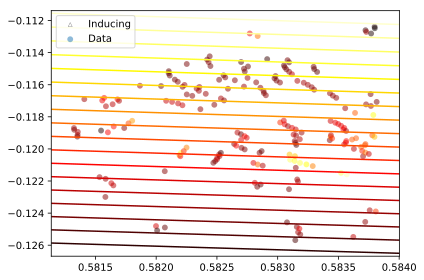

In [113]:
fig = m.plot()
display(m)

In [114]:
print (m.gradient)

[ 1.88926899e+00 -1.83618197e+00  5.64870031e+01  4.35741302e+01
  1.41269966e+02  1.81380590e+01 -3.22998370e+02  1.42277046e+02
 -3.09040902e+02  7.26899309e+01  6.20531271e+01  1.52756956e+01
 -1.47713657e+02  3.64146917e+02 -2.44951722e+01 -6.63106812e+01
  7.31131235e+00 -3.92681255e+00  1.31497837e+03  2.06035622e+03
  5.66246146e+00 -2.51424001e+01             inf -3.62887006e+03
  2.94427399e-01 -2.81797466e-01  1.53710241e+01  2.41648863e+00
  1.34944526e+00  1.15209707e+01 -6.73257125e-01 -1.10365574e+00
  1.20762704e+00  3.82908630e+01  1.63222456e+00  2.89868976e-01
  4.98900064e-01 -1.70300815e+00  3.54807733e+00  5.23662259e-01
  7.22996487e-01  1.79196674e-01 -4.58500840e-01 -2.97150654e-01
  6.38728173e+00 -1.34134395e+00 -1.52006642e+00  7.72334626e-01
  1.70467671e+00  9.79077561e-01 -2.83818445e+00 -1.72936453e+00
 -1.06107698e+00 -1.34502104e+00 -1.24171079e+00  1.18704835e+00
  7.09046153e-01 -3.12646154e+00 -4.14298844e-01  4.09542261e+00
  5.62106323e-02  2.73178

In [115]:
y_predict,noise=m.predict(feature_testlatlong.values)

In [116]:
y_predict

array([[5.88956702],
       [5.68705961],
       [5.98788559],
       ...,
       [3.54656468],
       [3.56313526],
       [3.56100022]])

In [117]:
windspeed_test

array([5.43878, 5.2034 , 5.49958, ..., 6.84264, 8.06548, 7.34996])

In [118]:
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

mse error on test set is -11848.627714686114.
